<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/o_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network tiny example

Let's create a CNN to recognize X or O shapes in a 9 x 9 pixel image and visualize convolutional filters and filtered images.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.losses import mean_squared_error
from keras.utils import img_to_array

In [38]:
# some constants
image_size = 18

In [3]:
# building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss=mean_squared_error, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                        

In [4]:
!wget -q -O o_x.png https://github.com/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/data/o_x.png?raw=true

In [39]:
# load all train and test as one image
img = Image.open('o_x.png').convert('L')

In [40]:
# training and test data
labels = ['O', 'X']
X_train = np.zeros((100, image_size, image_size), dtype='float32')
y_train = np.zeros(100, dtype='float32')
y_train[50:] = 1
X_test = np.zeros((40, image_size ,image_size), dtype='float32')
y_test = np.zeros(40, dtype='float32')
y_test[20:] = 1

float32


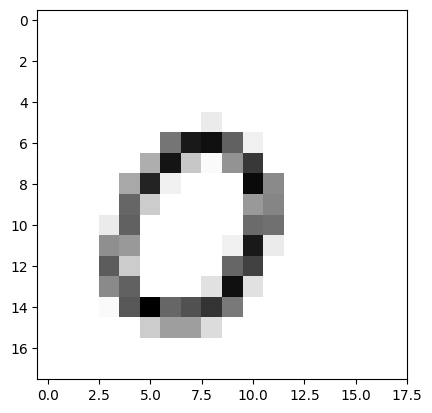

In [41]:
w = img_to_array(img.crop((2, 2, 116, 116)).resize((18,18)))[:,:,0] / 256.
#w = w.resize((9,9))
#w = img_to_array(w)[:,:,0]
print(w.dtype)
plt.imshow(w, cmap='gray')

In [42]:
# create train images
size = 118      # original size of a marker
border = 4
k = 0
for i in range(10):     # rows
    pixel_top = i * size + border
    pixel_bot = (i + 1) * size - border
    for j in range(10): # columns
        pixel_left = j * size + border
        pixel_righ = (j + 1) * size - border
        box = (pixel_left, pixel_top, pixel_righ, pixel_bot)
        sub_img = img_to_array(img.crop(box).resize((image_size, image_size)))[:,:,0]
        X_train[k] = sub_img / 356.
        k += 1

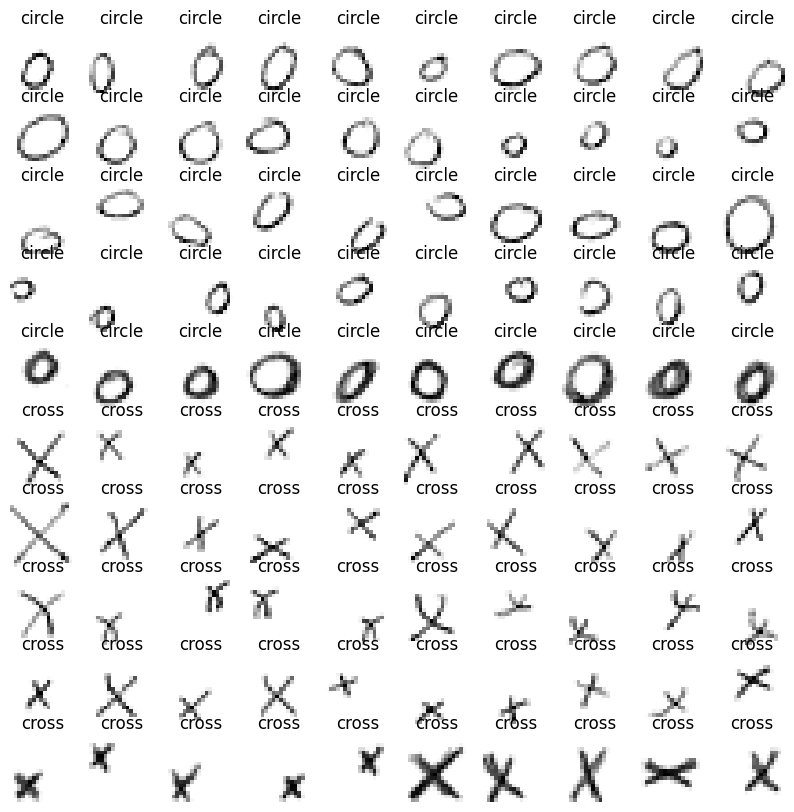

In [43]:
# show train images
labels = ["circle", "cross"]
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
ax = ax.ravel()
for i in range(100):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].set_title(labels[int(y_train[i])])
    ax[i].axis('off')

In [44]:
# create test images
size = 118
border = 5
k = 0
for i in range(12, 16):    # rows
    pixel_top = i * size + border
    pixel_bot = (i + 1) * size - border
    for j in range(10): # columns
        pixel_left = j * size + border
        pixel_righ = (j + 1) * size - border
        box = (pixel_left, pixel_top, pixel_righ, pixel_bot)
        sub_img = img_to_array(img.crop(box).resize((image_size, image_size)))[:,:,0]
        X_test[k] = sub_img /256.
        k += 1

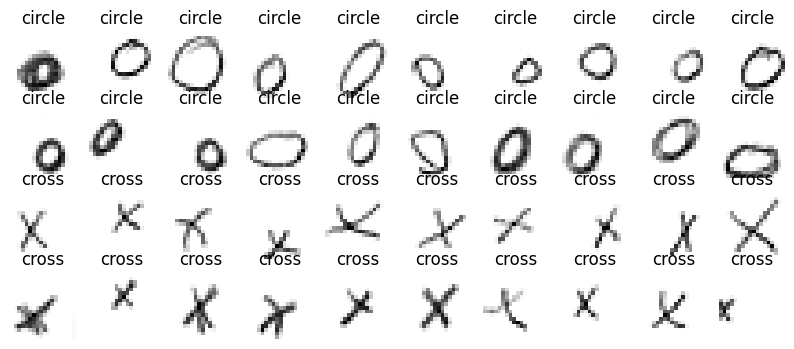

In [45]:
# show test images
fig, ax = plt.subplots(4,10, figsize=(10, 4))
ax = ax.ravel()
for i in range(40):
    ax[i].imshow(X_test[i], cmap='gray')
    ax[i].set_title(labels[int(y_test[i])])
    ax[i].axis('off')

In [13]:
%%time
epochs = 40
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/40
4/4 [==============================] - 4s 252ms/step - loss: 0.2524 - accuracy: 0.5400 - val_loss: 0.2502 - val_accuracy: 0.5000
Epoch 2/40
4/4 [==============================] - 0s 58ms/step - loss: 0.2501 - accuracy: 0.5400 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 3/40
4/4 [==============================] - 0s 50ms/step - loss: 0.2500 - accuracy: 0.4800 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 4/40
4/4 [==============================] - 0s 45ms/step - loss: 0.2500 - accuracy: 0.4700 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 5/40
4/4 [==============================] - 0s 56ms/step - loss: 0.2500 - accuracy: 0.6100 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 6/40
4/4 [==============================] - 0s 44ms/step - loss: 0.2500 - accuracy: 0.4600 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 7/40
4/4 [==============================] - 0s 79ms/step - loss: 0.2500 - accuracy: 0.4700 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 8/40
4/4 [==========

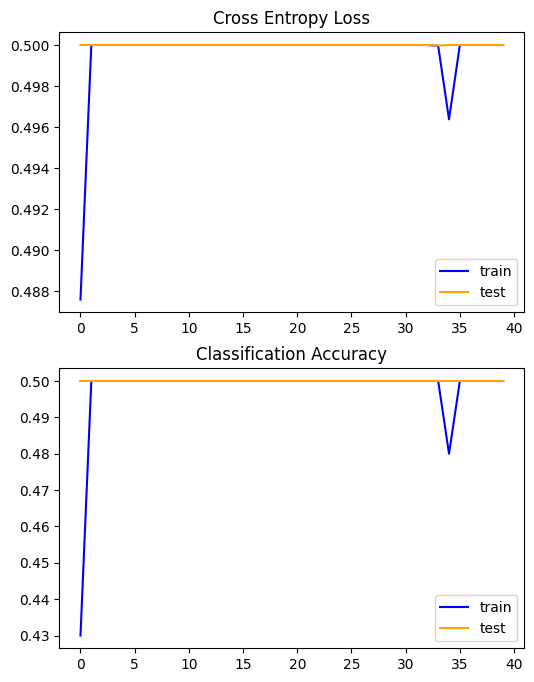

In [23]:
# plot diagnostic learning curves and optionaly save to file
def summarize_diagnostics(history, filename=None):
    # if file name given curves are saved to file and not displayed on screen
    fig, ax = plt.subplots(2, 1, figsize=(6, 8))
    ax[0].set_title('Cross Entropy Loss')
    ax[0].plot(history.history['loss'], color='blue', label='train')
    ax[0].plot(history.history['val_loss'], color='orange', label='test')
    ax[0].legend()
    # plot accuracy
    #plt.subplot(212)
    ax[1].set_title('Classification Accuracy')
    ax[1].plot(history.history['accuracy'], color='blue', label='train')
    ax[1].plot(history.history['val_accuracy'], color='orange', label='test')
    ax[1].legend(loc=4)
    plt.subplots_adjust(wspace=0.5)
    if filename:
        # save plot to file
        pyplot.savefig(filename + '_plot.png')
        pyplot.close()

summarize_diagnostics(history)

In [53]:
from sklearn import svm
from sklearn import metrics

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
XX_train = np.zeros((100, image_size * image_size), dtype='float32')
XX_test = np.zeros((40, image_size * image_size), dtype='float32')
for i in range(X_train.shape[0]):
    XX_train[i] = X_train[i].reshape(image_size * image_size)
for i in range(X_test.shape[0]):
    XX_test[i] = X_test[i].reshape(image_size * image_size)

# Accuracy: 0.725 / 0.75 C=1000000000.0  gamma=1e-06 kernel = rbf
C = 1000000000.0; gamma = 1e-6; kernel = 'rbf'
clf = svm.SVC(C=C, gamma=gamma, kernel=kernel)
clf.fit(XX_train, y_train)
y_test_pred = clf.predict(XX_test)
y_train_pred = clf.predict(XX_train)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred)} / {metrics.accuracy_score(y_train, y_train_pred)} C={C}")

Accuracy: 0.65 / 1.0 C=1000000000.0


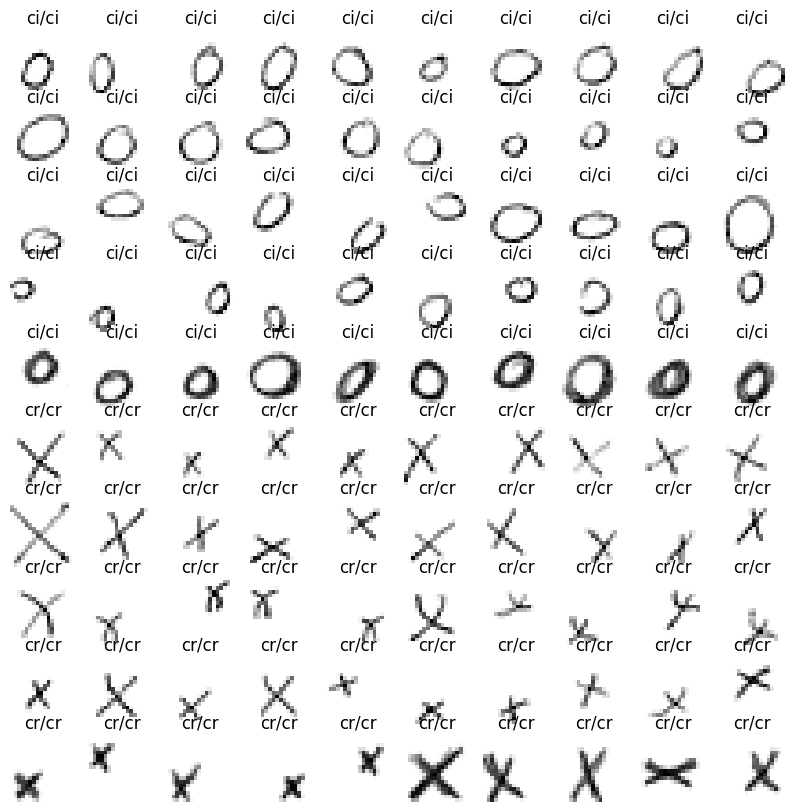

In [54]:
# show train images
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
ax = ax.ravel()
for i in range(100):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].set_title(f"{labels[int(y_train[i])][:2]}/{labels[int(y_train_pred[i])][:2]}")
    ax[i].axis('off')

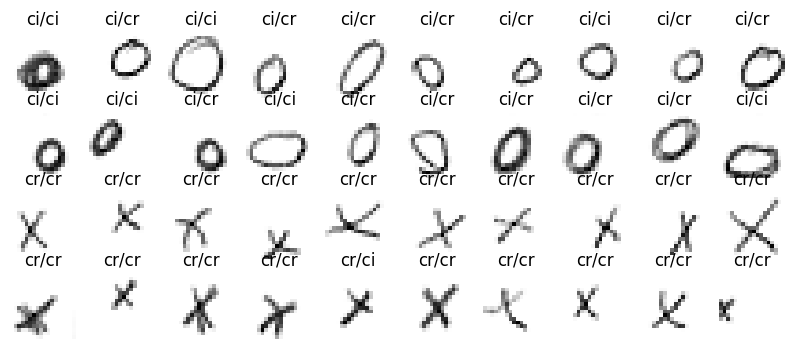

In [55]:
# show train images
fig, ax = plt.subplots(4, 10, figsize=(10, 4))
ax = ax.ravel()
for i in range(40):
    ax[i].imshow(X_test[i], cmap='gray')
    ax[i].set_title(f"{labels[int(y_test[i])][:2]}/{labels[int(y_test_pred[i])][:2]}")
    ax[i].axis('off')